In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 

In [2]:
data=pd.read_csv(r'C:\Users\HP\Desktop\data for projects\data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
y=data.diagnosis
list=['id','diagnosis','Unnamed: 32']
x=data.drop(list,axis=1)

In [6]:
x.shape

(569, 30)

Number of Benign :357
Number of Malignant :212


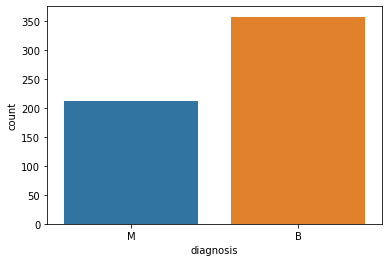

In [7]:
sns.countplot(y)
B,M=y.value_counts()
print('Number of Benign :{}'.format(B))
print('Number of Malignant :{}'.format(M))


In [8]:
data_dia=y
data=x
data_n_2=(data-data.mean())/(data.std()) dd
data=pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')




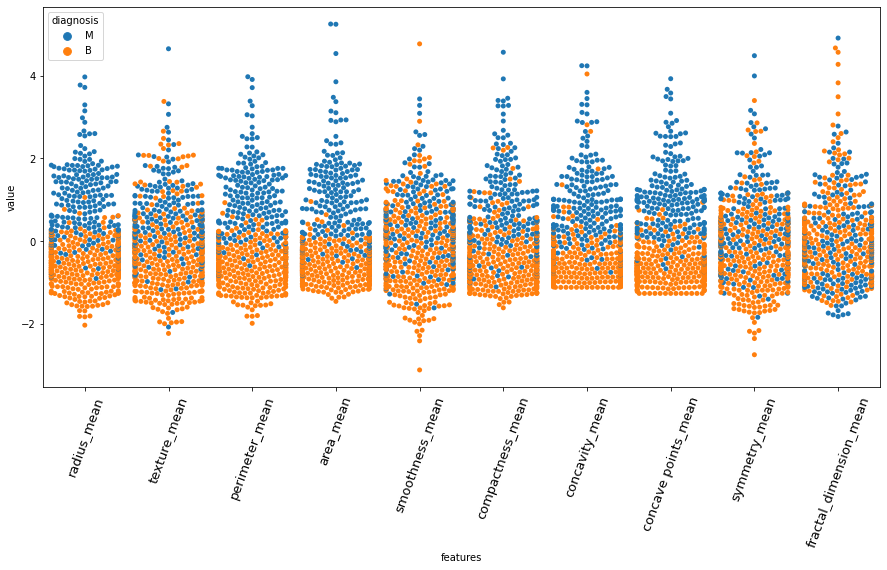

In [9]:
plt.figure(figsize=(15,7))
data=pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(size=13,rotation=70);


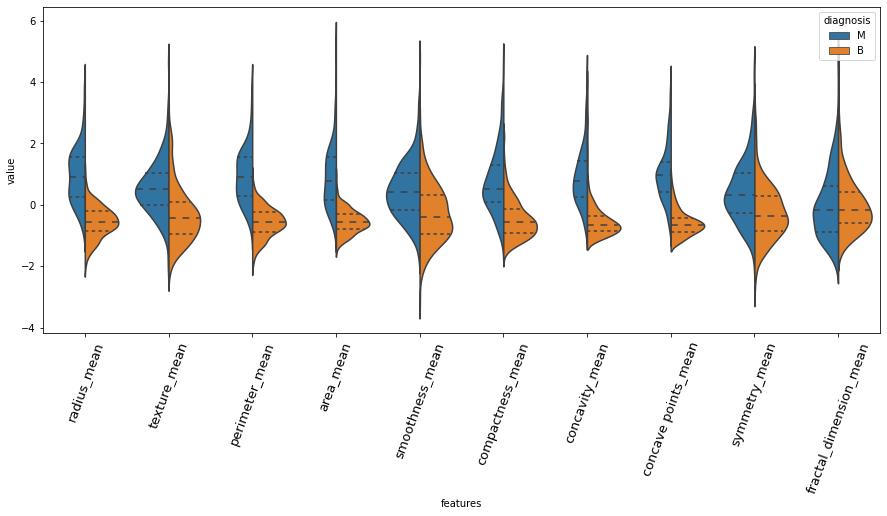

In [10]:
plt.figure(figsize=(15,6))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True, inner="quart");
plt.xticks(rotation=70);
plt.xticks(size=13);

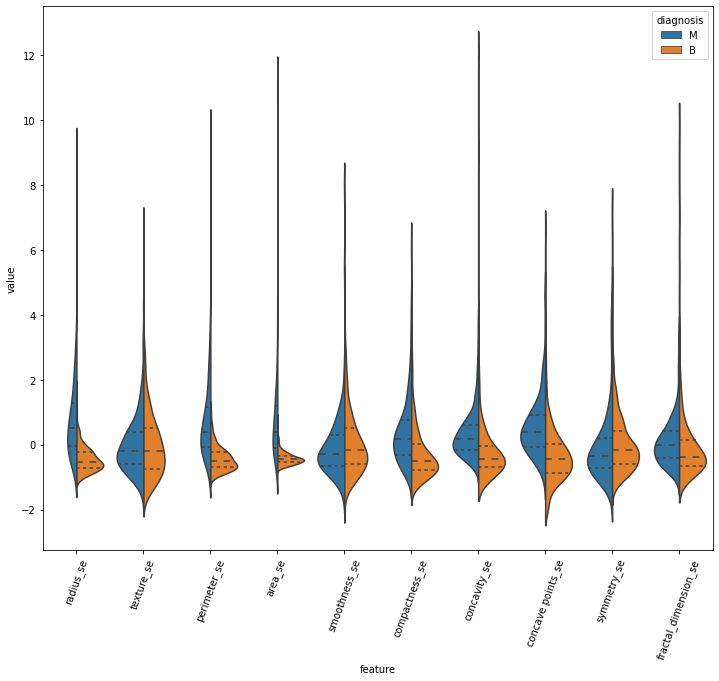

In [11]:
plt.figure(figsize=(12 ,10))
data=pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='feature',value_name='value')
sns.violinplot(x='feature',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=70);


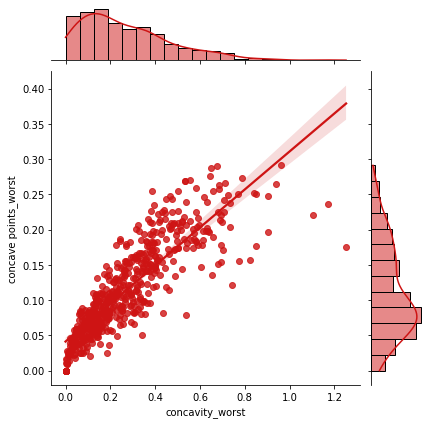

In [12]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

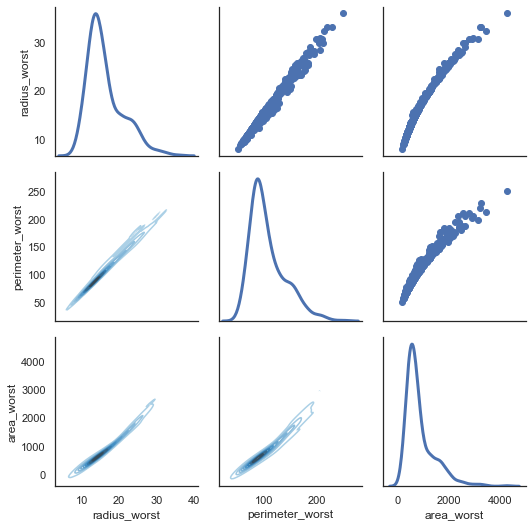

In [13]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

<AxesSubplot:>

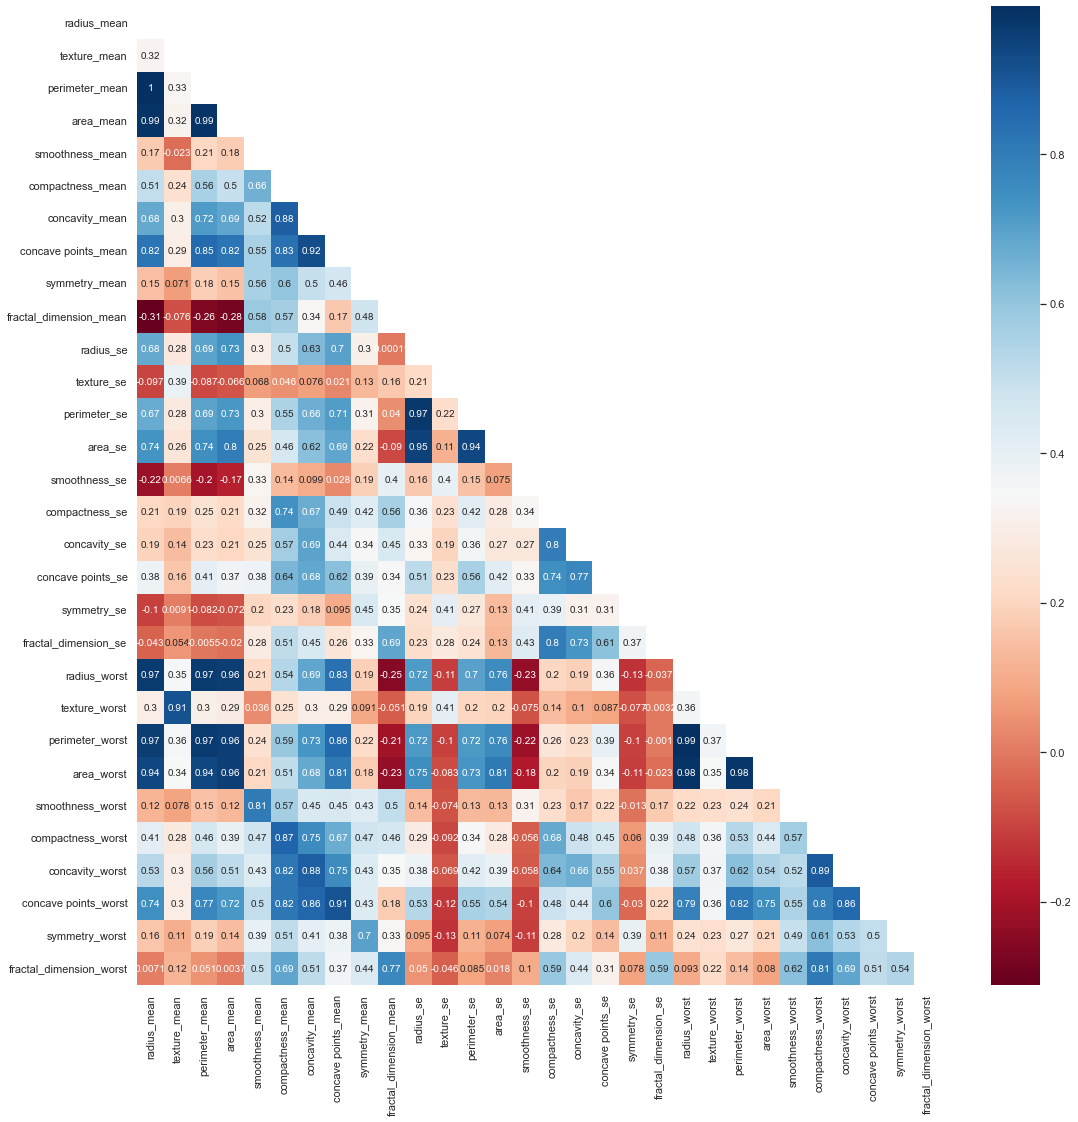

In [14]:
mask=np.zeros_like(x.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(),mask=mask,annot=True,annot_kws={'size':10},cmap='RdBu')


#                      FEATURE SELECTION 


In [15]:
#variance <=1
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=.001)
selector.fit(x)
lowvar_cols=[col for col in x.columns if col not in x.columns[selector.get_support()]]
lowvar_cols

['smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'smoothness_worst',
 'fractal_dimension_worst']

In [16]:
x.loc[:,'smoothness_mean'].var()

0.00019779970027290276

In [17]:
#dropping by correlation 
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )       

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_1,y,test_size=.2,random_state=42)

# recursive feature elimination  without cv

accuracy score :  0.9736842105263158


<AxesSubplot:>

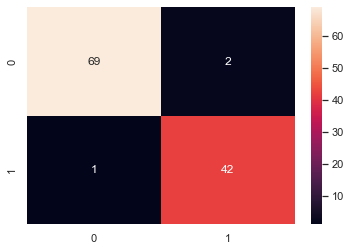

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
rfc2=RandomForestClassifier()
rfe=RFE(estimator=rfc2,step=1,n_features_to_select=5)
rfe=rfe.fit(x_train,y_train)

x_train_2 = rfe.transform(x_train)
x_test_2 = rfe.transform(x_test)


rfc2.fit(x_train_2,y_train)
acc_score=accuracy_score(y_test,rfc2.predict(x_test_2))
print('accuracy score : ',acc_score)
cm=confusion_matrix(y_test,rfc2.predict(x_test_2))
sns.heatmap(cm,annot=True)

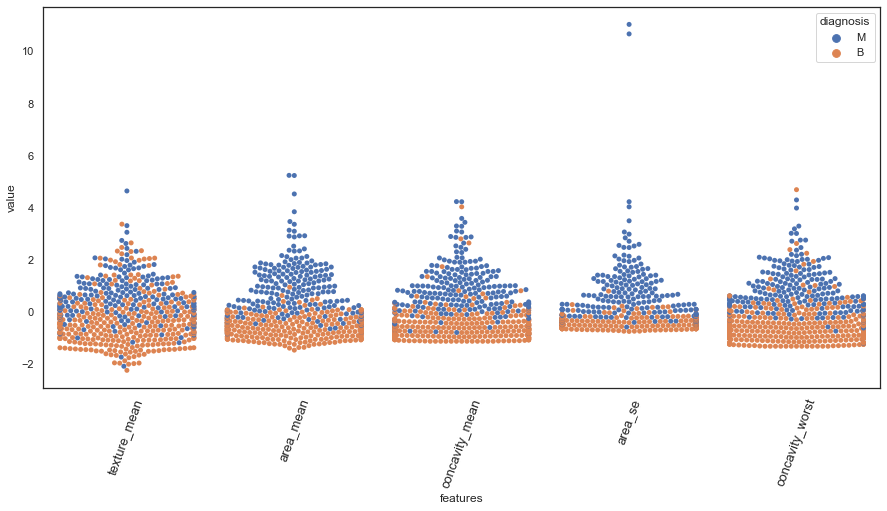

In [33]:
cols=x_train.columns[rfe.support_]
plt.figure(figsize=(15,7))
data=data_n_2.loc[:,cols]
data['diagnosis']=y
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(size=13,rotation=70);

# recursive feature elimination with cv

In [23]:
from sklearn.feature_selection import RFECV
rfc=RandomForestClassifier()
rfecv=RFECV(estimator=rfc,step=1,scoring='accuracy',cv=5)
rfecv=rfecv.fit(x_train,y_train)

In [24]:
#optimal number of features
rfecv.n_features_

11

In [25]:
rfecv.grid_scores_

array([0.81538462, 0.9010989 , 0.90769231, 0.91208791, 0.91428571,
       0.91648352, 0.94725275, 0.95384615, 0.94505495, 0.95384615,
       0.95604396, 0.95164835, 0.94945055, 0.95164835, 0.95384615,
       0.95384615])

In [26]:
x_train.columns[rfecv.support_]

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

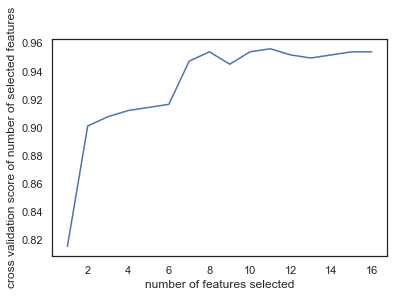

In [27]:
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


accuracy_score : 0.9736842105263158


<AxesSubplot:>

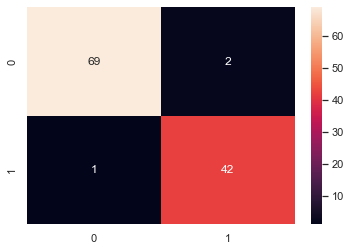

In [28]:
x_train_3=rfecv.transform(x_train)
x_test_3=rfecv.transform(x_test)

m=RandomForestClassifier()
m.fit(x_train_3,y_train)
acc_score_2=accuracy_score(y_test,m.predict(x_test_3))
print('accuracy_score :',acc_score_2)
cm_2=confusion_matrix(y_test,m.predict(x_test_3))
sns.heatmap(cm_2,annot=True)

# ploting the chosen features

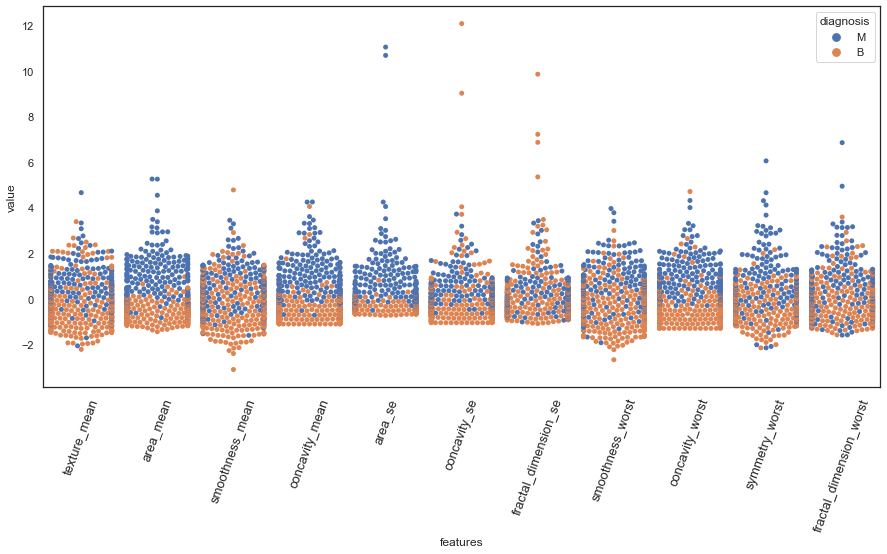

In [30]:
cols=x_train.columns[rfecv.support_]
plt.figure(figsize=(15,7))
data=data_n_2.loc[:,cols]
data['diagnosis']=y
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(size=13,rotation=70);

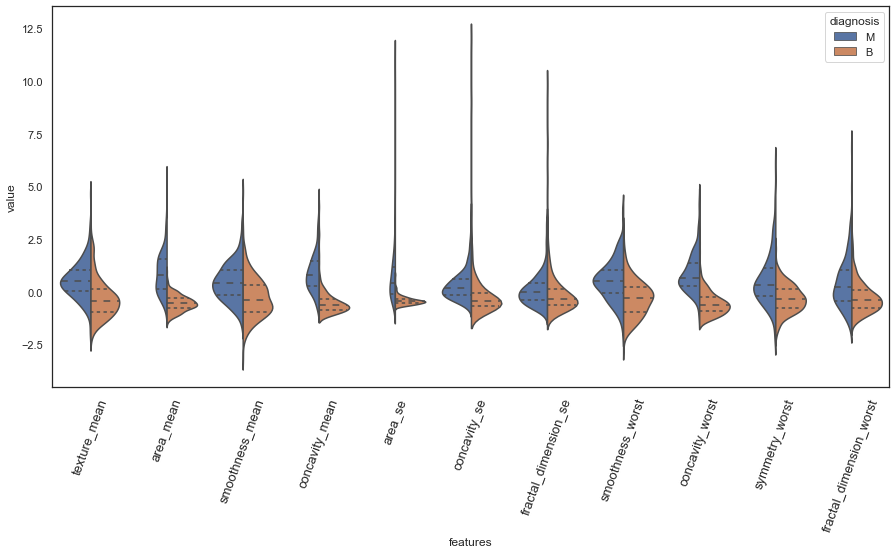

In [31]:
plt.figure(figsize=(15,7))
data=data_n_2.loc[:,cols]
data['diagnosis']=y
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(size=13,rotation=70);

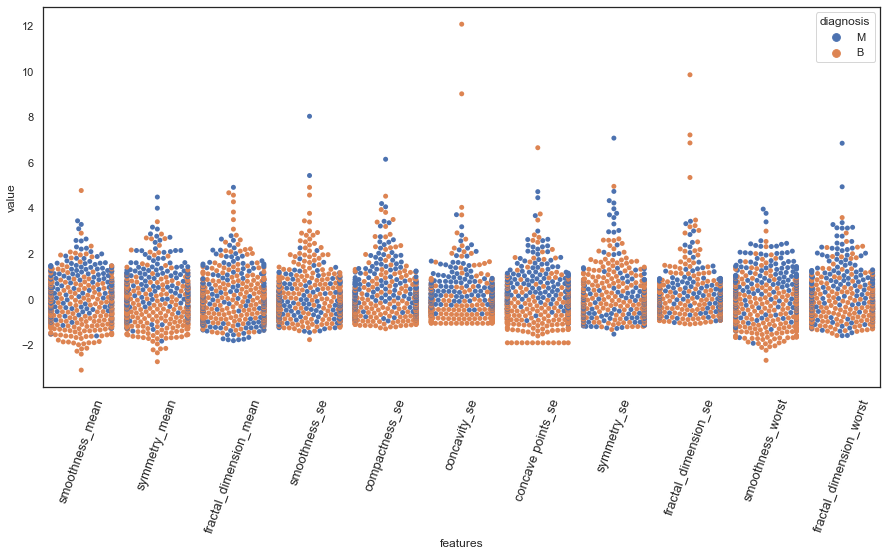

In [32]:
plt.figure(figsize=(15,7))
data=data_n_2.loc[:,lowvar_cols]
data['diagnosis']=y
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(size=13,rotation=70);

In [46]:
new_cols=x_train.columns[rfecv.support_]

In [51]:
cols_without_lowvar=[col for col in new_cols  if col not in lowvar_cols ]


accuracy_score : 0.9736842105263158


<AxesSubplot:>

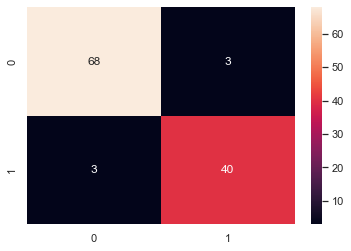

In [52]:
x_train_4=x_train[cols_without_lowvar]
x_test_4=x_test[cols_without_lowvar]

m=RandomForestClassifier()
m.fit(x_train_4,y_train)
acc_score_3=accuracy_score(y_test,m.predict(x_test_4))
print('accuracy_score :',acc_score_2)
cm_3=confusion_matrix(y_test,m.predict(x_test_4))
sns.heatmap(cm_3,annot=True)